# Data Science with Python - Course 1 - Week 9 - Machine Learning

## Lectures

## Scikit-learn

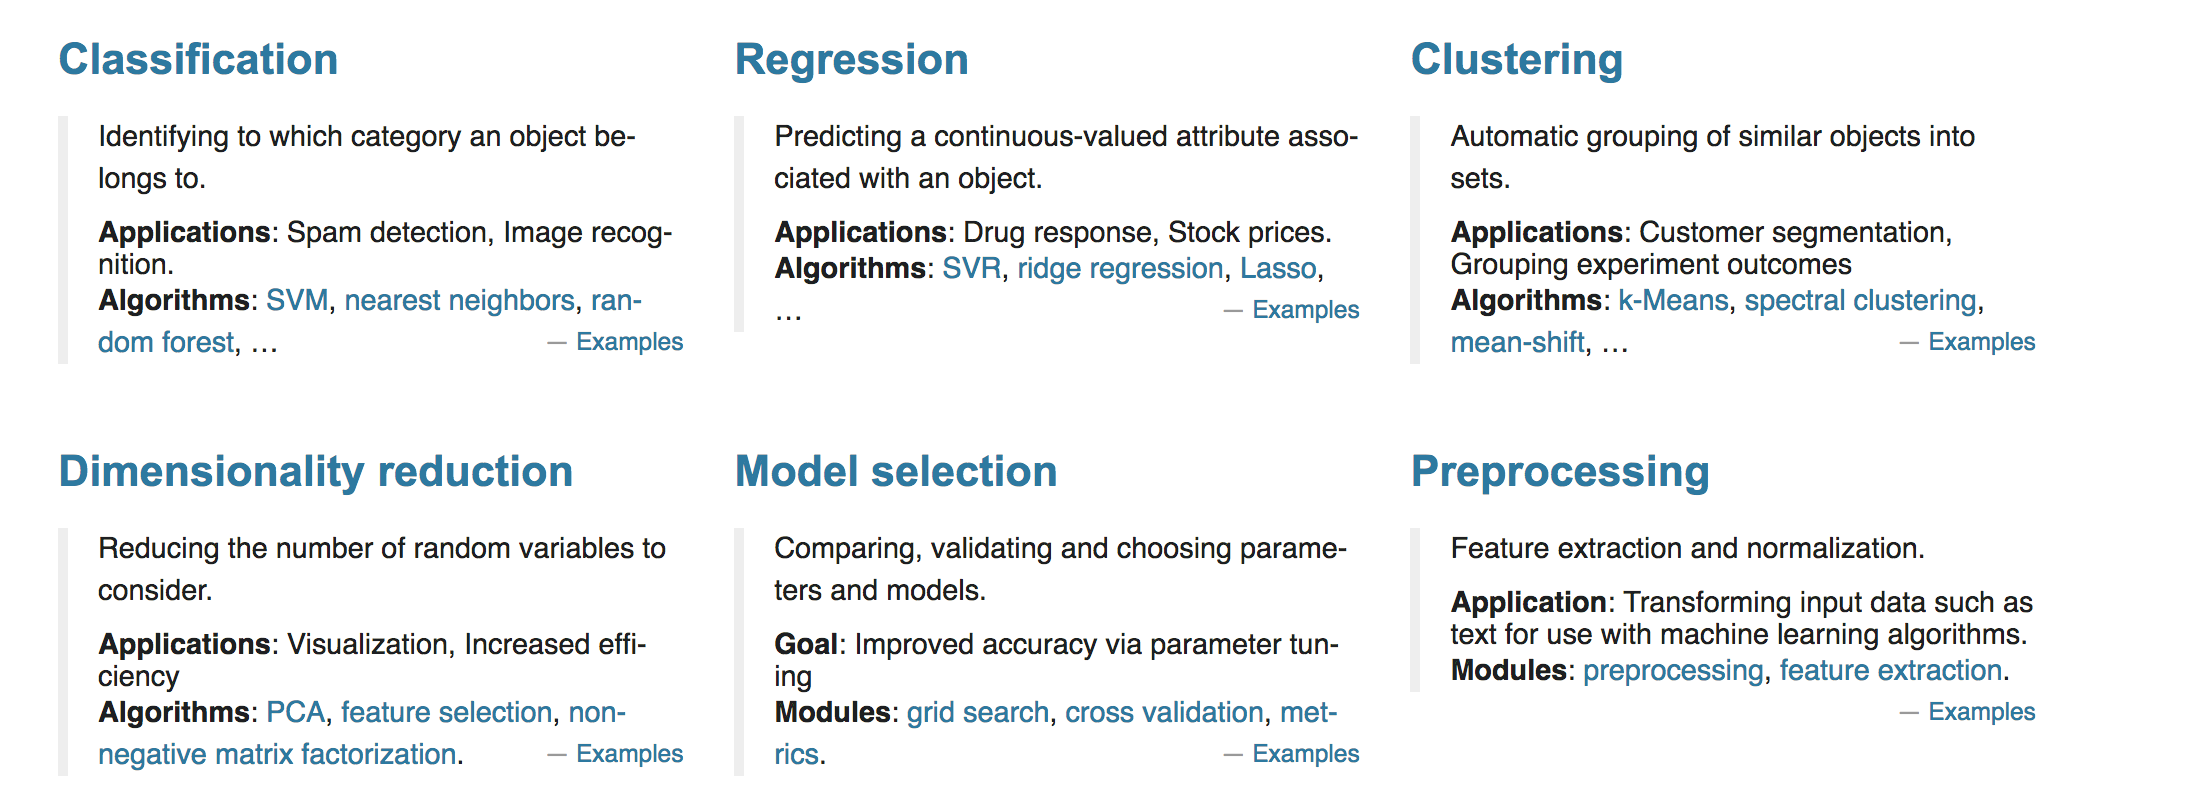

In [19]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
Image(filename='scikit-learn.png', width=600) 

### Simple Linear Regression and Polynomial Regression 

#### Importing libs and Loading dataset 

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
dataset = pd.read_csv('data/Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [23]:
dataset.tail()

,Position,Level,Salary
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


#### Ploting Salary vs Position Level

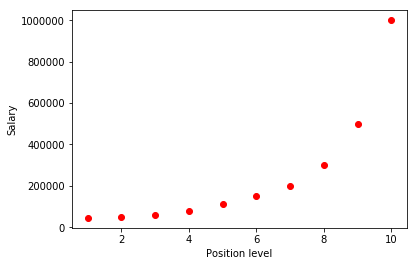

In [24]:
plt.scatter(X, y, color = 'red')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

#### Fitting and predicting using LR model

In [25]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print("Predited salary for position level 6.5 is {:.2f}".format(lin_reg.predict(6.5)[0])) 

Predited salary for position level 6.5 is 330378.79


In [26]:
print("Linear regression score:{:.3f}".format(lin_reg.score(X,y)))

Linear regression score:0.669


In [27]:
print("Predicting function y=ax+b where")
print("a="+str(lin_reg.coef_[0]))
print("b="+str(lin_reg.intercept_))

Predicting function y=ax+b where
a=80878.7878788
b=-195333.333333


In [28]:
#### Model Plotting

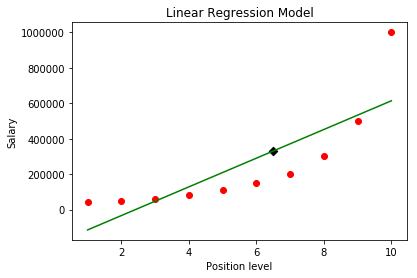

In [29]:
plt.scatter(X, y, color = 'red')
plt.scatter([6.5],lin_reg.predict(6.5), color ='black', marker ='D')
plt.plot(X, lin_reg.predict(X), color = 'green')
plt.title('Linear Regression Model')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

#### Using a Polynomial Regression

In [30]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg_4 = PolynomialFeatures(degree = 4)
X_poly = poly_reg_4.fit_transform(X)

lin_reg_4 = LinearRegression()
lin_reg_4.fit(X_poly, y)

print("Predited salary for position level 6.5 is {:.2f}"\
      .format(lin_reg_4.predict(poly_reg_4.fit_transform(6.5))[0]))

Predited salary for position level 6.5 is 158862.45


In [31]:
print("Polynomial regression score:", lin_reg_4.score(X_poly,y))
print("a="+str(lin_reg_4.coef_))
print("b="+str(lin_reg_4.intercept_))

Polynomial regression score: 0.997392289171
a=[      0.         -211002.33100292   94765.44289063  -15463.28671331
     890.15151515]
b=184166.666667


#### Ploting

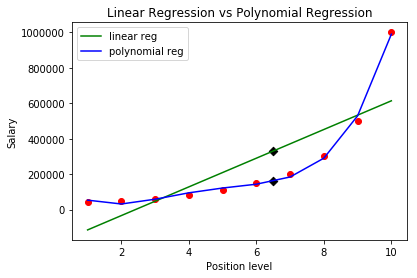

In [32]:
plt.scatter(X, y, color = 'red')
plt.scatter([6.5,6.5],[lin_reg.predict(6.5)[0],lin_reg_4.predict(poly_reg_4.fit_transform(6.5))[0]],\
            color ='black', marker ='D')
plt.plot(X, lin_reg.predict(X), color = 'green', label ='linear reg')
plt.plot(X, lin_reg_4.predict(poly_reg_4.fit_transform(X)), color = 'blue',\
         label='polynomial reg')
plt.title('Linear Regression vs Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.legend()
plt.show()

### Unsupervised Learning

A task involving machine learning may not be linear, but it has a number of well known steps:

* Problem definition.
* Preparation of Data.
* Learn an underlying model.
* Improve the underlying model by quantitative and qualitative evaluations.
* Present the model.

<b>Unsupervised Learning:</b>
No labels are given to the learning algorithm, leaving it on its own to find structure in its input. Unsupervised learning can be a goal in itself (discovering hidden patterns in data) or a means towards an end (feature learning).

<b>Unsupervised Learning</b>

In some pattern recognition problems, the training data consists of a set of input vectors x without any corresponding target values. The goal in such unsupervised learning problems may be to discover groups of similar examples within the data, where it is called *clustering*, or to determine how the data is distributed in the space, known as *density estimation*. To put forward in simpler terms, for a *n*-sampled space x1 to xn, true class labels are not provided for each sample, hence known as *learning without teacher*.

**Issues with Unsupervised Learning:**

* Unsupervised Learning is harder as compared to Supervised Learning tasks.
* How do we know if results are meaningful since no answer labels are available?
* Let the expert look at the results (external evaluation)
* Define an objective function on clustering (internal evaluation)

**Why Unsupervised Learning is needed despite of these issues?**

* Annotating large datasets is very costly and hence we can label only a few examples manually. Example: Speech Recognition
* There may be cases where we don’t know how many/what classes is the data divided into. Example: Data Mining
* We may want to use clustering to gain some insight into the structure of the data before designing a classifier.

**Unsupervised Learning can be further classified into two categories:**

* Parametric Unsupervised Learning

In this case, we assume a parametric distribution of data. It assumes that sample data comes from a population that follows a probability distribution based on a fixed set of parameters. Theoretically, in a normal family of distributions, all members have the same shape and are parameterized by mean and standard deviation. That means if you know the mean and standard deviation, and that the distribution is normal, you know the probability of any future observation. Parametric Unsupervised Learning involves construction of Gaussian Mixture Models and using Expectation-Maximization algorithm to predict the class of the sample in question. This case is much harder than the standard supervised learning because there are no answer labels available and hence there is no correct measure of accuracy available to check the result.

* Non-parametric Unsupervised Learning

In non-parameterized version of unsupervised learning, the data is grouped into clusters, where each cluster(hopefully) says something about categories and classes present in the data. This method is commonly used to model and analyze data with small sample sizes. Unlike parametric models, nonparametric models do not require the modeler to make any assumptions about the distribution of the population, and so are sometimes referred to as a distribution-free method.

*Yan Lecun, director of AI research, explains that unsupervised learning — teaching machines to learn for themselves without having to be explicitly told if everything they do is right or wrong — is the key to “true” AI.*

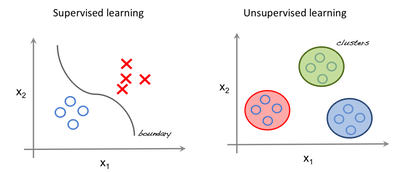

In [20]:
Image(filename='supervised-vs-unsupervised.png', width=600) 

The image to the left is an example of *supervised learning*; we use techniques to find the best fit line between the features. While in *unsupervised learning* the inputs are segregated based on features and the prediction is based on which cluster it belonged.

**Important Terminology**

* *Feature*: An input variable used in making predictions.

* *Predictions*: A model’s output when provided with an input example.

* *Example*: One row of a data set. An example contains one or more features and possibly a label.

* *Label*: Result of the feature.

### Dataset


Iris dataset, again, will be used. The dataset contains a set of 150 records under 5 attributes — Petal Length , Petal Width , Sepal Length , Sepal width and Class. Iris Setosa, Iris Virginica and Iris Versicolor are the three classes. For our Unsupervised Algorithm we give these four features of the Iris flower and predict which class it belongs to.

We use sklearn Library in Python to load Iris dataset, and matplotlib for data visualisation. Below is the code snippet for exploring the dataset.

In [37]:
iris_df

{'data': array([[ 5.1,  3.5,  1.4,  0.2],
        [ 4.9,  3. ,  1.4,  0.2],
        [ 4.7,  3.2,  1.3,  0.2],
        [ 4.6,  3.1,  1.5,  0.2],
        [ 5. ,  3.6,  1.4,  0.2],
        [ 5.4,  3.9,  1.7,  0.4],
        [ 4.6,  3.4,  1.4,  0.3],
        [ 5. ,  3.4,  1.5,  0.2],
        [ 4.4,  2.9,  1.4,  0.2],
        [ 4.9,  3.1,  1.5,  0.1],
        [ 5.4,  3.7,  1.5,  0.2],
        [ 4.8,  3.4,  1.6,  0.2],
        [ 4.8,  3. ,  1.4,  0.1],
        [ 4.3,  3. ,  1.1,  0.1],
        [ 5.8,  4. ,  1.2,  0.2],
        [ 5.7,  4.4,  1.5,  0.4],
        [ 5.4,  3.9,  1.3,  0.4],
        [ 5.1,  3.5,  1.4,  0.3],
        [ 5.7,  3.8,  1.7,  0.3],
        [ 5.1,  3.8,  1.5,  0.3],
        [ 5.4,  3.4,  1.7,  0.2],
        [ 5.1,  3.7,  1.5,  0.4],
        [ 4.6,  3.6,  1. ,  0.2],
        [ 5.1,  3.3,  1.7,  0.5],
        [ 4.8,  3.4,  1.9,  0.2],
        [ 5. ,  3. ,  1.6,  0.2],
        [ 5. ,  3.4,  1.6,  0.4],
        [ 5.2,  3.5,  1.5,  0.2],
        [ 5.2,  3.4,  1.4,  0.2],
      

['DESCR', 'data', 'feature_names', 'target', 'target_names']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


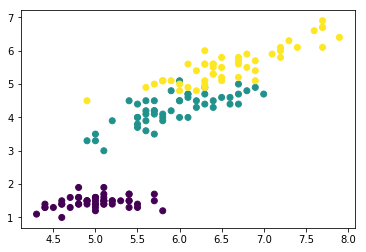

In [35]:
# Importing Modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Loading dataset
iris_df = datasets.load_iris()

# Available methods on dataset
print(dir(iris_df))

# Features
print(iris_df.feature_names)

# Targets
print(iris_df.target)

# Target Names
print(iris_df.target_names)
label = {0: 'red', 1: 'blue', 2: 'green'}

# Dataset Slicing
x_axis = iris_df.data[:, 0]  # Sepal Length
y_axis = iris_df.data[:, 2]  # Sepal Width

# Plotting
plt.scatter(x_axis, y_axis, c=iris_df.target)
plt.show()

**What is Clustering?**

“Clustering” is the process of grouping similar entities together. The goal of this unsupervised machine learning technique is to find similarities in the data point and group similar data points together.

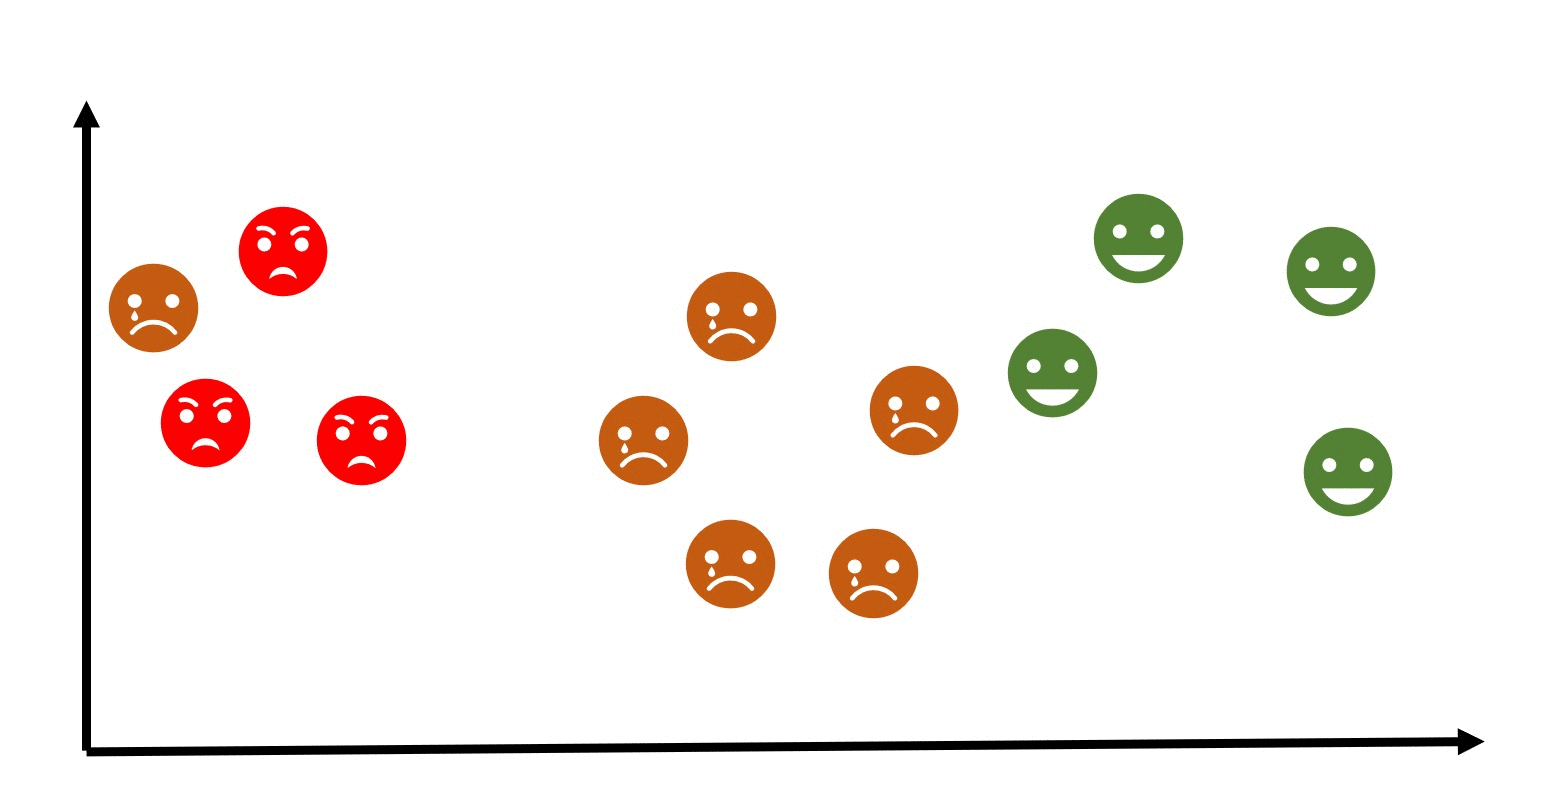

In [13]:
Image(filename='clustering.gif', width=600) 

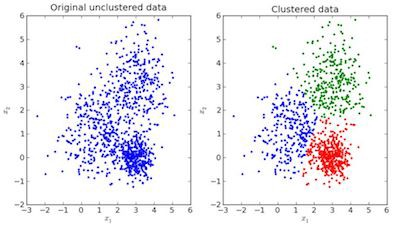

In [14]:
Image(filename='clustering_example.jpeg', width=600) 

**K-Means Clustering in Python**

*K-means* is an iterative clustering algorithm that aims to find local maxima in each iteration. Initially desired number of clusters are chosen. Since we know that there are 3 classes involved, we program the algorithm to group the data into 3 classes, by passing the parameter “n_clusters” into our *K-Means* model. Now randomly three points(inputs) are assigned into three cluster. Based on the centroid distance between each points the next given inputs are segregated into respected clusters. Now, re-computing the centroids for all the clusters.

Each centroid of a cluster is a collection of feature values which define the resulting groups. Examining the centroid feature weights can be used to qualitatively interpret what kind of group each cluster represent.

We import *K-Means* model from *sklearn* library, fit out features and predict.

In [41]:
# Importing Modules
from sklearn import datasets
from sklearn.cluster import KMeans

# Loading dataset
iris_df = datasets.load_iris()

# Declaring Model
model = KMeans(n_clusters=3)

# Fitting Model
model.fit(iris_df.data)

# Predicitng a single input
predicted_label = model.predict([[7.2, 3.5, 0.8, 1.6]])

# Prediction on the entire data
all_predictions = model.predict(iris_df.data)

# Printing Predictions
print(predicted_label)
print(all_predictions)
print(iris_df.target)

[1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


** Hierarchical Clustering **

Hierarchical clustering, as the name implies is an algorithm that builds a hierarchy of clusters. This algorithm begins with all the data assigned to a cluster of their own. Then two closest clusters are joined into the same cluster. In the end, this algorithm ends when there is only a single cluster left.

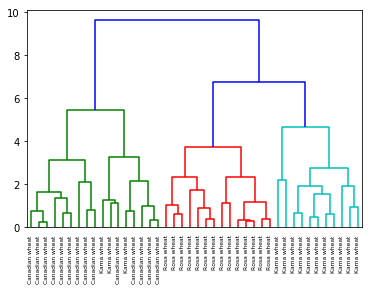

In [16]:
# Importing Modules
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd

# Reading the DataFrame
seeds_df = pd.read_csv(
    "https://raw.githubusercontent.com/vihar/unsupervised-learning-with-python/master/seeds-less-rows.csv")

# Remove the grain species from the DataFrame, save for later
varieties = list(seeds_df.pop('grain_variety'))

# Extract the measurements as a NumPy array
samples = seeds_df.values

"""
Perform hierarchical clustering on samples using the
linkage() function with the method='complete' keyword argument.
Assign the result to mergings.
"""
mergings = linkage(samples, method='complete')

"""
Plot a dendrogram using the dendrogram() function on mergings,
specifying the keyword arguments labels=varieties, leaf_rotation=90,
and leaf_font_size=6.
"""
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
           )

plt.show()

**t-SNE Clustering**

It is one of the unsupervised learning method for visualisation. t-SNE stands for t-distributed stochastic neighbor embedding. It maps high dimensional space into a 2 or 3 dimensional space which can be visualised. Specifically, it models each high-dimensional object by a two- or three-dimensional point in such a way that similar objects are modeled by nearby points and dissimilar objects are modeled by distant points with high probability.

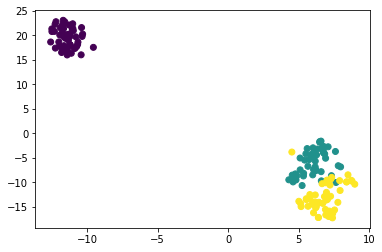

In [15]:
# Importing Modules
from sklearn import datasets
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Loading dataset
iris_df = datasets.load_iris()

# Defining Model
model = TSNE(learning_rate=100)

# Fitting Model
transformed = model.fit_transform(iris_df.data)

# Plotting 2d t-Sne
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis, c=iris_df.target)
plt.show()

Here as the Iris dataset has four features(4d) it is transformed and represented in two dimensional figure. Similarly t-SNE model can be applied to a dataset which has n-features.

**DBSCAN Clustering**

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular clustering algorithm used as an replacement to K-means in predictive analytics. It doesn’t require that you input the number of clusters in order to run. But in exchange, you have to tune two other parameters.

The scikit-learn implementation provides a default for the eps and min_samples parameters, but you’re generally expected to tune those. The eps parameter is the maximum distance between two data points to be considered in the same neighborhood. The min_samples parameter is the minimum amount of data points in a neighborhood to be considered a cluster.

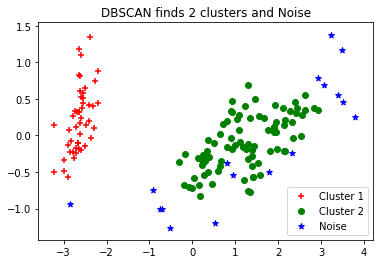

In [18]:
# Importing Modules
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Load Dataset
iris = load_iris()

# Declaring Model
dbscan = DBSCAN()

# Fitting
dbscan.fit(iris.data)

# Transforing Using PCA
pca = PCA(n_components=2).fit(iris.data)
pca_2d = pca.transform(iris.data)

# Plot based on Class
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')

plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Noise'])
plt.title('DBSCAN finds 2 clusters and Noise')
plt.show()

**More Unsupervised Techniques:**
    
* Principal Component Analysis (PCA)
* Anomaly detection
* Autoencoders
* Deep Belief Nets
* Hebbian Learning
* Generative Adversarial Networks(GANs)
* Self-Organizing maps

### The main steps behind principal component analysis

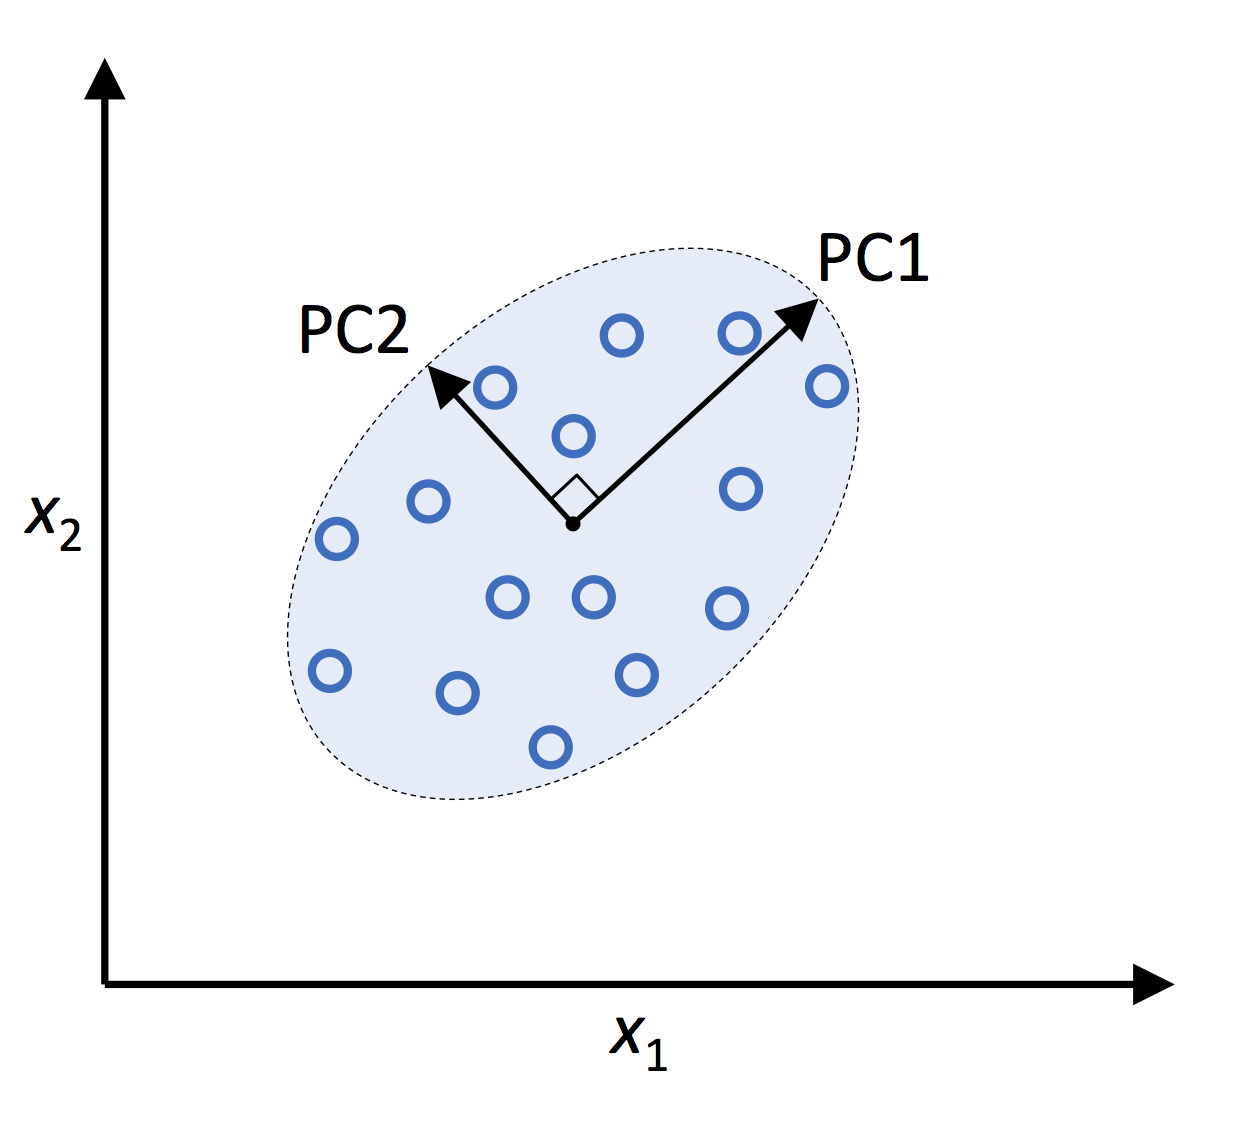

In [5]:
Image(filename='pca.png', width=200) 

In [42]:

import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

# if the Wine dataset is temporarily unavailable from the
# UCI machine learning repository, un-comment the following line
# of code to load the dataset from a local path:

# df_wine = pd.read_csv('wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [44]:
df_wine.shape

(178, 14)

In [7]:
# Splitting the data into 70% training and 30% test subsets.
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, 
                     stratify=y,
                     random_state=0)

In [8]:
# Standardizing the data.
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [9]:

from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([ 0.36951469,  0.18434927,  0.11815159,  0.07334252,  0.06422108,
        0.05051724,  0.03954654,  0.02643918,  0.02389319,  0.01629614,
        0.01380021,  0.01172226,  0.00820609])

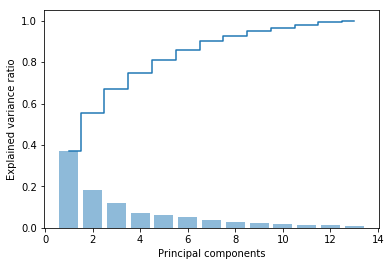

In [12]:
plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

In [13]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

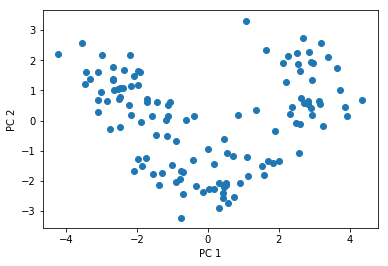

In [14]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [15]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

In [16]:
# Training logistic regression classifier using the first 2 principal components.
from sklearn.linear_model import LogisticRegression

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train)

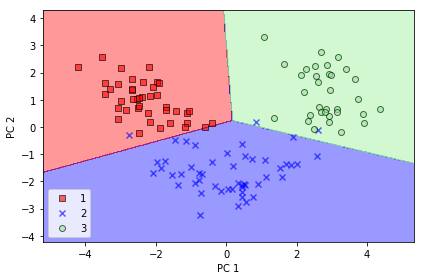

In [17]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

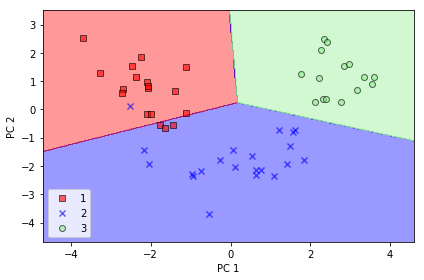

In [18]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

### Reference
1. fastai.com (http://course.fast.ai/ml.html)
2. https://medium.com/@hiromi_suenaga/machine-learning-1-lesson-1-84a1dc2b5236
3. https://machinelearningmastery.com/parametric-and-nonparametric-machine-learning-algorithms/
4. https://towardsdatascience.com/unsupervised-learning-and-data-clustering-eeecb78b422a
5. https://towardsdatascience.com/unsupervised-learning-with-python-173c51dc7f03
6. https://towardsdatascience.com/clustering-unsupervised-learning-788b215b074b
7. https://github.com/rasbt/python-machine-learning-book-2nd-edition/blob/master/code/ch05/ch05.ipynb



## Homework #9

1. The dataset below is made up of 1797 8x8 images. Each image, like the one shown below, is of a hand-written digit.

http://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits

Get familiar with this dataset. You can refer to the link:

https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html#sphx-glr-auto-examples-datasets-plot-digits-last-image-py

2. Apply PCA to 10 components. Then apply k-means with 10 clusters, plot the result with centroids and discuss on the result. 
3. Apply PCA to 2 components. Apply k-means with 10 clusters, plot the result with centroids and discuss on the result. 